csc536 Data Viz.

SIT@KMUTT

March 2022

by PM

- Reference:Python Data Analytics by Fabio Nelli, APress, 2015
- Some more basics of Python's Numpy, Pandas, and Pyplot

Pyplot is a collection of functions that make matplotlib work like MATLAB.
- It is a state-based interface to matplotlib 
- Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
- Ref: https://matplotlib.org/3.5.1/index.html

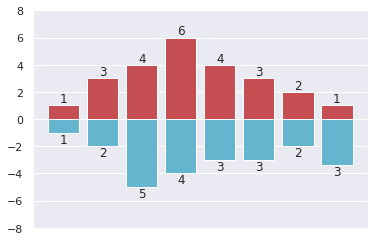

In [31]:
# more on Pandas, Numpy, and plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Show the two comparison bar charts, placed on the opposite directions of the y-axis.
# Also the plot shows how to place texts on each bar

x0 = np.arange(8)
y1 = np.array([1,3,4,6,4,3,2,1])
y2 = np.array([1,2,5,4,3,3,2,3.4])

plt.ylim(-8,8) # limit on the y-axis's value range
plt.bar(x0,y1,0.8,facecolor='r',edgecolor='w')   # width (default = 0.8)
plt.bar(x0,-y2,0.8,facecolor='c',edgecolor='w')
plt.xticks(())   # not showing the x-axis's ticks
plt.grid(True)

for x, y in zip(x0, y1):
 plt.text(x, y, '%d' %y, ha='center', va= 'bottom')  # ha is a horizontal alignment

for x, y in zip(x0, y2):
 plt.text(x, -y, '%d' %y, ha='center', va= 'top')  # va is a vertical alignment


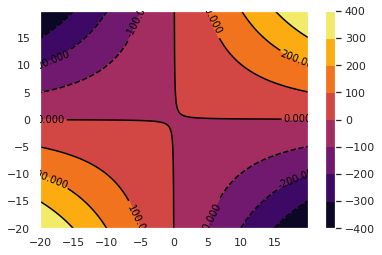

In [34]:
# Advanced charts
# contour maps

def f(x,y):
    # return(y-5*x)  # linear
    return((x*y)-1) # hyperbola
    # return(x*x + y*y)   # circle


dx = 0.05; dy = 0.05
x = np.arange(-20.0,20.0,dx)
y = np.arange(-20.0,20.0,dy)
X,Y = np.meshgrid(x,y)

C = plt.contour(X,Y,f(X,Y),8,colors='black')
plt.contourf(X,Y,f(X,Y),8,cmap=plt.cm.inferno)   # fill the contour; perceptually uniform shades of black-red-yellow
plt.clabel(C, inline=1, fontsize=10)
plt.colorbar()


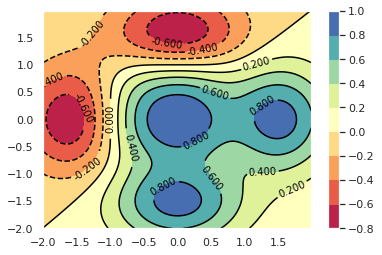

In [36]:
# function z = f (x, y) for generating a three-dimensional surface.
# for a contour map

def f(x,y):
    return (1 - y**5 + x**5)*np.exp(-x**2-y**2)


dx = 0.01; dy = 0.01
x = np.arange(-2.0,2.0,dx)
y = np.arange(-2.0,2.0,dy)
X,Y = np.meshgrid(x,y)

C = plt.contour(X,Y,f(X,Y),9,colors='black')  # contour map
# plt.contourf(X,Y,f(X,Y),9)
# plt.contourf(X,Y,f(X,Y),9,cmap=plt.cm.hot)   # "hot" color map
# plt.contourf(X,Y,f(X,Y),9,cmap=plt.cm.plasma) #  perceptually uniform shades of blue-red-yellow

plt.contourf(X,Y,f(X,Y),9,cmap=plt.cm.Spectral)   # "spectral/rainbow" color map
plt.clabel(C, inline=1, fontsize=10)
plt.colorbar()


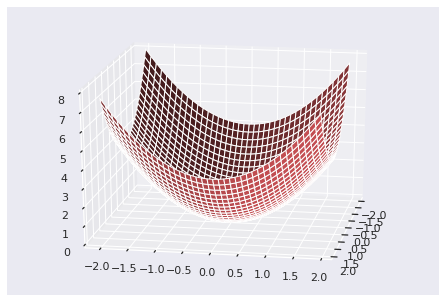

In [39]:
# 3d plot
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-2,2,0.1)
Y = np.arange(-2,2,0.1)
X,Y = np.meshgrid(X,Y)

def f(x,y):
    # return (1 - y**5 + x**5)*np.exp(-x**2-y**2)
    return (x**2 + y**2)
#     return (y-5*x+4)

ax.plot_surface(X,Y,f(X,Y), rstride=1, cstride=1, color = 'r')
ax.view_init(elev=20,azim=10)  # adjust the view angle/point. Default is (elev=None, azim=None)


Text(0.5, 0, 'Z Label')

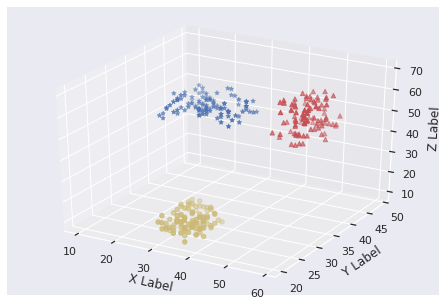

In [40]:
# Scatter plot in 3D

# 1st of data
xs = np.random.randint(30,40,size =100)   # Return random integers from low (inclusive) to high (exclusive).
ys = np.random.randint(20,30,100)   # randint(low, high=None, size=None)
zs = np.random.randint(10,20,100)

# 2nd set of data
xs2 = np.random.randint(50,60,100)
ys2 = np.random.randint(30,40,100)
zs2 = np.random.randint(50,70,100)

# 3rd set of data
xs3 = np.random.randint(10,30,100)
ys3 = np.random.randint(40,50,100)
zs3 = np.random.randint(40,50,100)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs,ys,zs,color='y')
ax.scatter(xs2,ys2,zs2,c='r',marker='^')  # use c= or color=
ax.scatter(xs3,ys3,zs3,c='b',marker='*')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

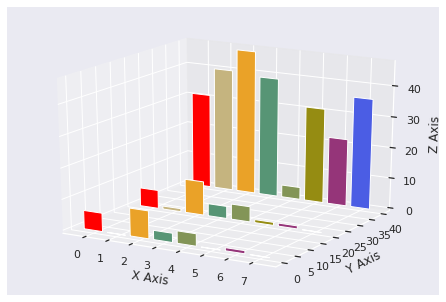

In [45]:
# 3D bar charts

x = np.arange(8)
y = np.random.randint(0,10,8)
y2 = y + np.random.randint(0,3,8)
y3 = np.random.randint(0,50,8) 

fig = plt.figure()
ax = Axes3D(fig)
clr = ['#FF0000', '#c5b47f', '#EAA228', '#579575', '#839557', '#958c12', '#953579', '#4b5de4']

ax.bar(x,y,0,zdir='y',color=clr)   #the direction to use as z for data plotting ('x', 'y' or 'z'); defaults to 'z'.
ax.bar(x,y2,20,zdir='y',color=clr) 
ax.bar(x,y3,40,zdir='y',color=clr)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

ax.view_init(elev=20) # adjust the view angle/point


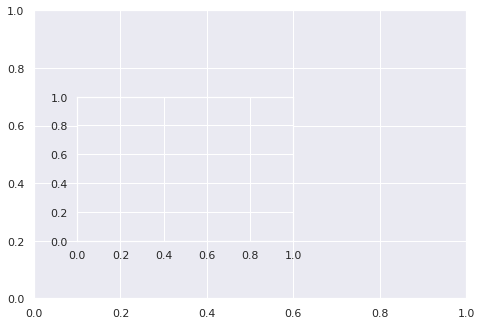

In [67]:
# Multi-panel plots
# subplot(s) within other subplot(s)

fig = plt.figure()
rect = 0.1,0.2,0.5,0.5 # rect [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height
ax = fig.add_axes([0.0,0.0,1.0,1.0])
inner_ax = fig.add_axes(rect)  

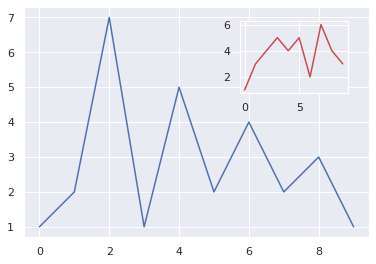

In [48]:
# try to plot

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
inner_ax = fig.add_axes([0.6,0.6,0.25,0.25])

x1 = np.arange(10)
y1 = np.array([1,2,7,1,5,2,4,2,3,1])
x2 = np.arange(10)
y2 = np.array([1,3,4,5,4,5,2,6,4,3])
ax.plot(x1,y1)
inner_ax.plot(x2,y2, color='r')

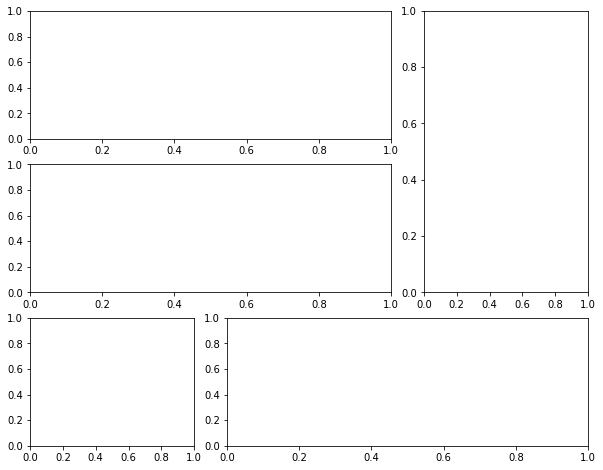

In [ ]:
# Multi-panel plots
# Grids of subplots using: GridSpec() function

# A grid subdivision allows splitting the drawing area into a grid of sub-areas, 
# to which you can assign one or more of them to each subplot, so that in the end 
# you can obtain subplots with different sizes and orientations

gs = plt.GridSpec(3,3)  # divided into 3 by 3 sub-area grid

fig = plt.figure(figsize=(10,8))
fig.add_subplot(gs[0,:2])  # top left
fig.add_subplot(gs[1,:2])  # middle left
fig.add_subplot(gs[:2,2])  # top right

fig.add_subplot(gs[2,0])   # bottom left
fig.add_subplot(gs[2,1:])  # bottom right

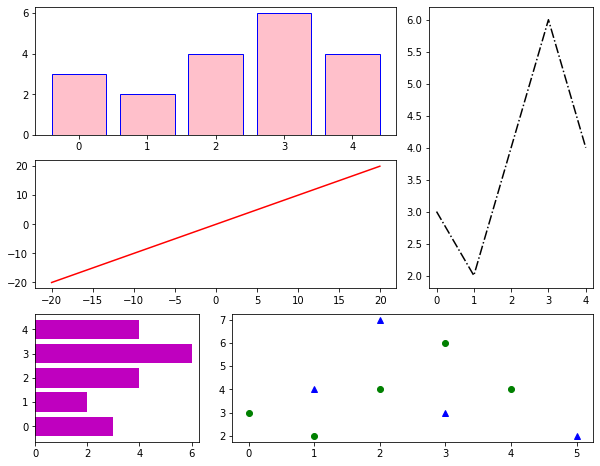

In [ ]:
# Grids of subplots

gs = plt.GridSpec(3,3)
fig = plt.figure(figsize=(10,8))

x1 = np.array([1,3,2,5])
y1 = np.array([4,3,7,2])
x2 = np.arange(5)
y2 = np.array([3,2,4,6,4])

s1 = fig.add_subplot(gs[0,:2])  
s1.bar(x2,y2,color='pink',edgecolor='b')

s2 = fig.add_subplot(gs[1,:2])
s2.plot(x,y,'r')

s3 = fig.add_subplot(gs[:2,2])
s3.plot(x2,y2,'k-.')

s4 = fig.add_subplot(gs[2,0])
s4.barh(x2,y2,color='m')

s5 = fig.add_subplot(gs[2,1:])
s5.plot(x1,y1,'b^',x2,y2,'go')

In [21]:
# Extra note and moving into another graphical plot library, Seaborn.

# Seaborn is a library for making statistical graphics in Python. 
# It builds on top of matplotlib and integrates closely with pandas data structures. 
# Seaborn helps you explore and understand your data.

# An example of using Seaborn for plotting
# Ref: https://seaborn.pydata.org/introduction.html

import seaborn as sns

# see available datasets
sns.get_dataset_names()

# Apply the default theme
sns.set_theme()


In [ ]:
# Relational plots are used for visualizing the statistical relationship between the data points. 
# Visualization is necessary because it allows the human to see trends and patterns in the data

# Drawing relational plots; it provides access to several different axes-level functions that show 
# the relationship between two variables with semantic mappings of data subsets.

# The relationship between x and y can be shown for different subsets of the data using the hue, 
# size, and style parameters. 

# These parameters control what visual semantics are used to identify the different subsets. 
# It is possible to show up to three dimensions independently by using all 
# three semantic types, but this style of plot can be hard to interpret and is often ineffective.

# Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making 
# graphics more accessible.

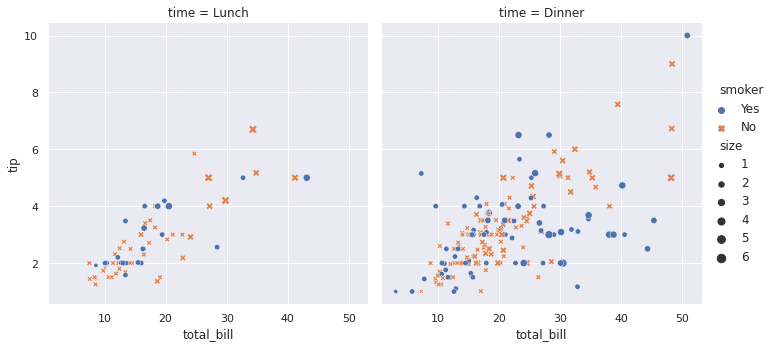

In [20]:
# Load an example dataset
tips = sns.load_dataset("tips")

# Create a simple 2D visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size")


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [9]:

penguins = sns.load_dataset("penguins")

penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


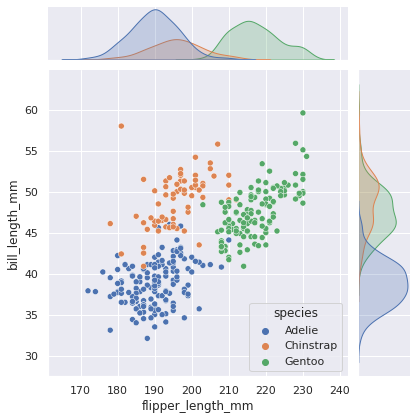

In [8]:
# Draw a plot of two variables with bivariate and univariate graphs.

sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

Later, we will look at more examples of Seaborn plotting.
- Ref: https://seaborn.pydata.org/introduction.html